In [1]:
%matplotlib inline
import splat
import splat.database as spd
import splat.plot as splot
import splat.empirical as spem
import pandas
import numpy
from scipy.interpolate import interp1d
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import astropy.constants as constants
import astropy.units as u
from astropy.io import ascii, fits            # for reading in spreadsheet
#/bfold = '/Users/adam/papers/toi2406/'
sxdfile ='/users/caganze/research/J1624/data/nires_J1624-3212_20200720.fits'

Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Could not import regions, which is required for some of the functionalities of this module.


In [2]:
def readsxd(file,output='1dspec',name='',**kwargs):
    funit = u.erg/u.s/u.cm/u.cm/u.Angstrom
    wunit = u.micron
    xrngs = [[1.95,2.47],[1.43,1.81],[1.1,1.5],[0.92,1.2],[0.83,1.02],[0.735,0.93],[0.7,0.8]]
    with fits.open(file, **kwargs) as hdulist:
        header = hdulist[0].header
        meta = {'header': header}
        data = hdulist[0].data
    spec = []
    orders = header['ORDERS'].split(',')
    for i in range(len(data[:,0,0])):
        sp = splat.Spectrum(wave=data[i,0,:]*wunit,flux=data[i,1,:]*funit,noise=data[i,2,:]*funit,header=header,instrument='SPEX-SXD',name='{} order {}'.format(name,orders[i]))
        sp.trim(xrngs[i])
        spec.append(sp)
        
    if output=='multispec': return spec
    elif output=='1dspec':
        spc = spec[0]
        for s in spec[1:]: spc = splat.stitch(spc,s,scale=False)
        spc.name=name
        return spc
        
    else: return data



In [3]:
xrng = [0.83,1.02]
s = readsxd(sxdfile,name='TOI-2406',output='1dspec')
#s.plot(yrange=[-1.e-16,5.e-15])

In [8]:
for r in ['rojas','terrien','mann13','mann14','newton']:
    spem.metallicity(s,ref=r,verbose=True, plot=True)

Computing [Fe/H] from Rojas et al. (2012) (2012ApJ...748...93R), valid for M0-M5, ??? < [Fe/H] < ???
K-band [Fe/H] = 0.21+/-0.10
K-band [M/H] = 0.16+/-0.10
Computing [Fe/H] from Terrrien et al. (2012) (2012ApJ...747L..38T), valid for M0--M5, -0.25 < [Fe/H] < +0.3
K-band [Fe/H] = 0.23+/-0.12
H-band [Fe/H] = -0.46+/-0.12
Computing [Fe/H] from Mann et al. (2013) (2013AJ....145...52M), valid for K5--M5, -1.04 < [Fe/H] < +0.56
J-band [Fe/H] = 0.09+/-0.07
J-band [M/H] = 0.18+/-0.08
H-band [Fe/H] = -0.21+/-0.07
H-band [M/H] = -0.08+/-0.08
K-band [Fe/H] = 0.21+/-0.07
K-band [M/H] = 0.16+/-0.08
Computing [Fe/H] from Mann et al. (2014) (2014AJ....147..160M), valid for M4.5--M9.5, -0.58 < [Fe/H] < +0.56
K-band [Fe/H] = 0.08+/-0.07
Computing [Fe/H] from Newton et al. (2014) (2014AJ....147...20N), valid for M1--M5, -1.0 < [Fe/H] < +0.35
K-band [Fe/H] = 0.30+/-0.12


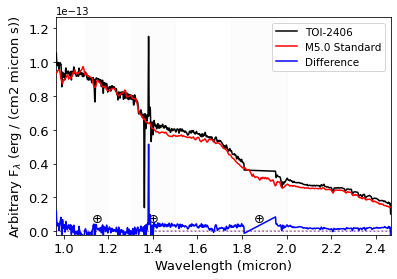

('M5.0', 0.5)

In [9]:
###### classify smoothed spectrum
s.reset()
s.smooth(30)
s.name='TOI-2406'
splat.classifyByStandard(s,plot=True,method='kirkpatrick',telluric=True)

In [10]:
s.reset()

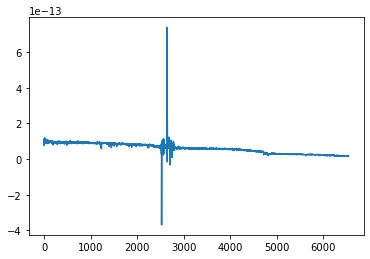

In [11]:
plt.plot(s.flux)